# Search Algorithm Homework - CMPE 252
#### Jesus David Montes

In [1]:
# Imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Load Map Data from SGB 128

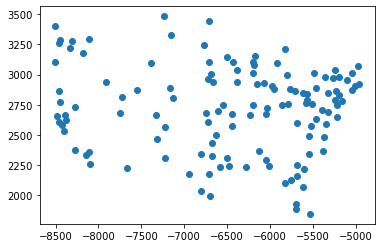

In [2]:
# XY Coordinates
x,y = np.loadtxt('sgb128_xy.txt', unpack=True) #xy coordinates
plt.scatter(x,y);

In [3]:
# Road Distances
D = np.loadtxt('sgb128_dist.txt')

In [4]:
# City Names
names = np.genfromtxt('sgb128_name.txt', dtype='str', delimiter='\n').tolist()
N = len(names) #number of nodes

## Create Network Graph

In [5]:
G = nx.Graph()
G_pos = {}

# Add Nodes
for i, name in enumerate(names):
    G.add_node(name, pos=(x[i], y[i]))
    G_pos[name] = (x[i], y[i])

In [6]:
# Distance Function
def distance(a, b):
    return np.linalg.norm(np.array(G_pos[a])-np.array(G_pos[b]))

# Provided Distance
def prov_dist(a, b):
    return D[names.index(a)][names.index(b)]

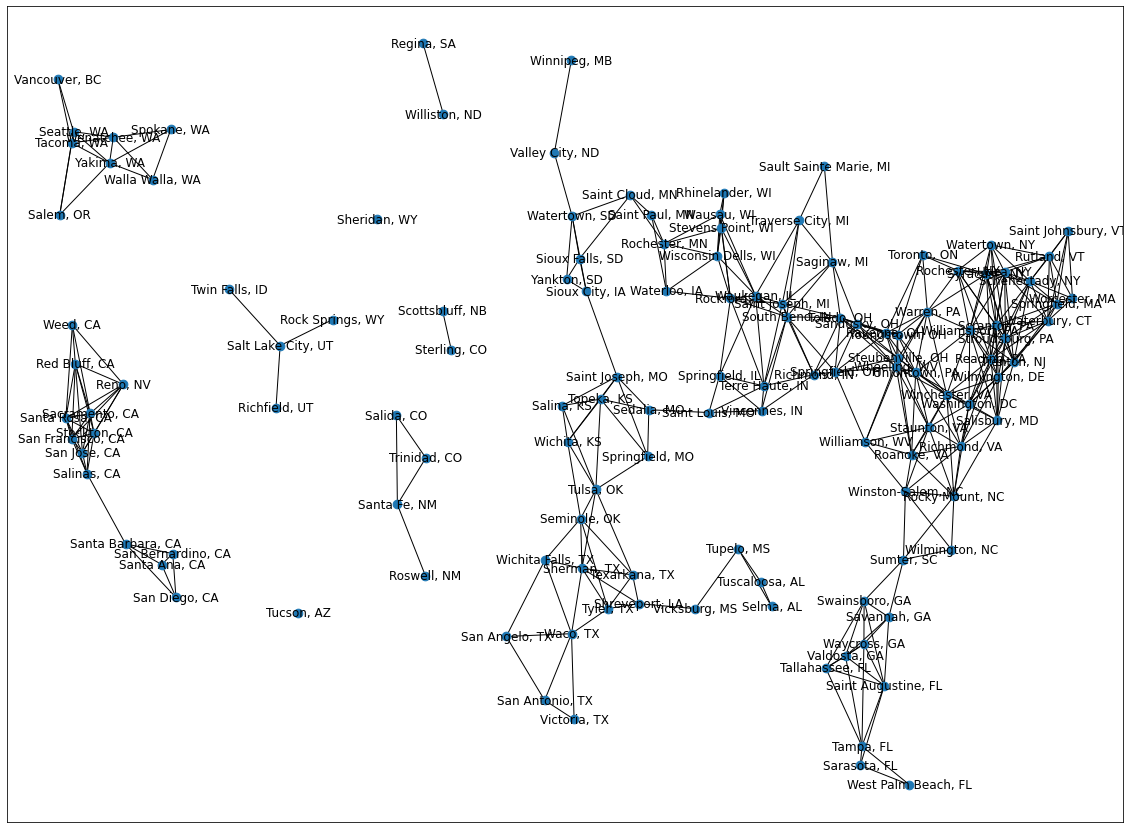

In [7]:
# Add Edges
for i, i_name in enumerate(names):
    for j, j_name in enumerate(names):
        euclid_dist = distance(i_name, j_name) #euclidian distance between two nodes
        if (i is not j) and (euclid_dist <= 230):
            G.add_edge(i_name, j_name, drive=D[i][j], dist=euclid_dist)

plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos=G_pos, node_size=75)

## Shortest Distance
### Start and Destination:

In [8]:
start = names[6]
destination = names[16]
print('Start: {}\t\tDestination: {}'.format(start, destination))

Start: Winnipeg, MB		Destination: West Palm Beach, FL


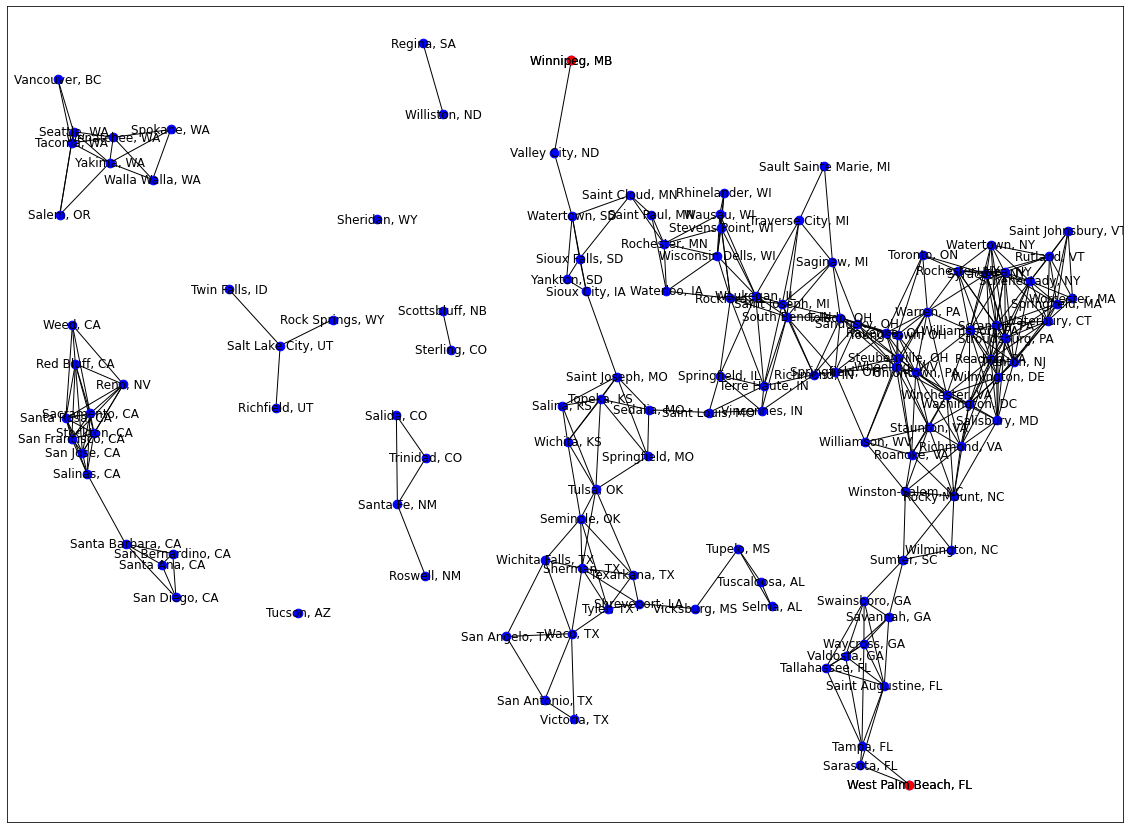

In [9]:
plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph([start, destination]), pos=G_pos, node_size=75, node_color='red')

#### Path Length Function:

In [10]:
def path_length(node_list, distance_calc):
    dist_list = []
    for i in range(len(node_list)-1):
        if distance_calc == 'euclidean':
            dist_list.append(distance(node_list[i], node_list[i+1]))
        elif distance_calc == 'provided':
            dist_list.append(prov_dist(node_list[i], node_list[i+1]))
    return np.sum(np.array(dist_list))

### No Heuristic A*

In [11]:
astar_path = nx.astar_path(G, start, destination, weight='drive')
print(astar_path)

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Saint Joseph, MI', 'Toledo, OH', 'Steubenville, OH', 'Roanoke, VA', 'Richmond, VA', 'Rocky Mount, NC', 'Sumter, SC', 'Swainsboro, GA', 'Valdosta, GA', 'Tampa, FL', 'West Palm Beach, FL']


Total Path Length:
Euclidean = 3345.422547498203 miles
Provided Distances = 11588.0 miles


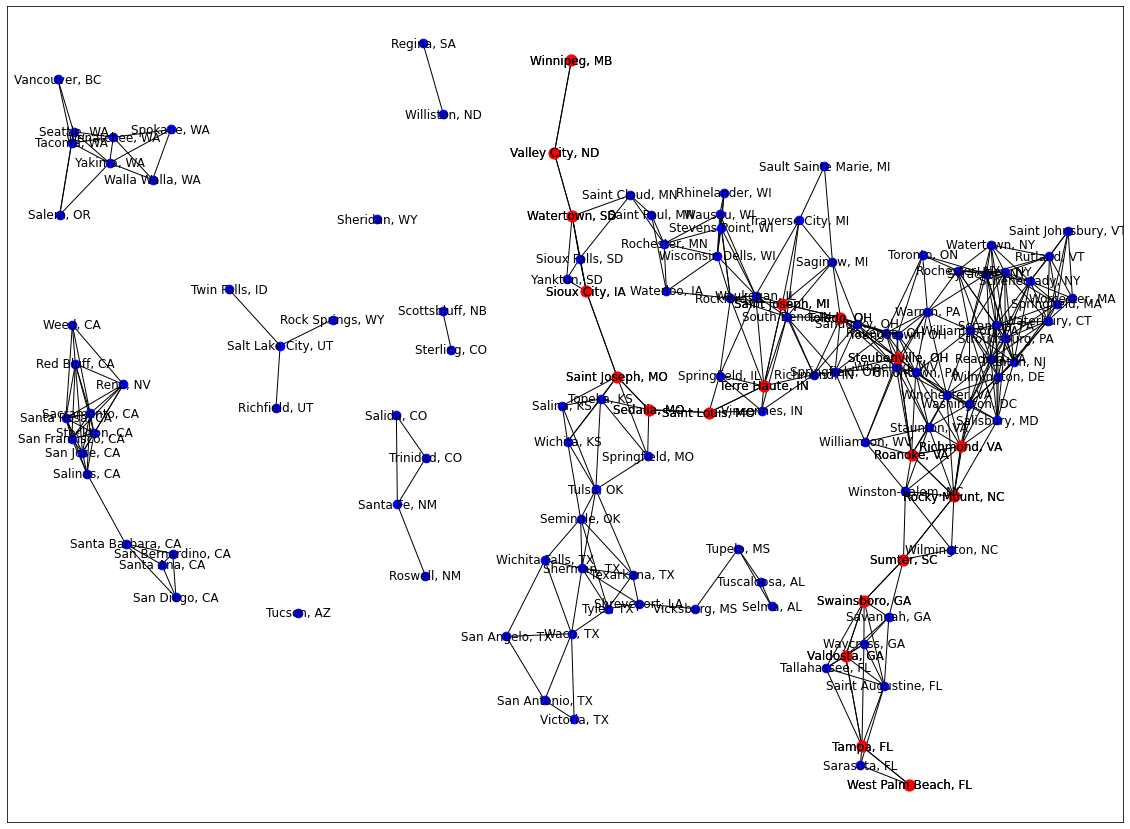

In [12]:
plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path), pos=G_pos, node_size=125, node_color='red')

print('Total Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path, 'provided')))

#### Comments
Without a heuristic, the algorithm provides an interesting result. The route takes a significant north-bound detour when the destination is primarily south.

### Heuristic A* Calculation

In [13]:
# Weighted Distance Function
h_weight = 1
def weighted_distance(a, b):
    return h_weight*distance(a, b)

#### Heuristic Weight = 0.5

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Saint Joseph, MI', 'Toledo, OH', 'Steubenville, OH', 'Roanoke, VA', 'Richmond, VA', 'Rocky Mount, NC', 'Sumter, SC', 'Swainsboro, GA', 'Valdosta, GA', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 3345.422547498203 miles
Provided Distances = 11588.0 miles


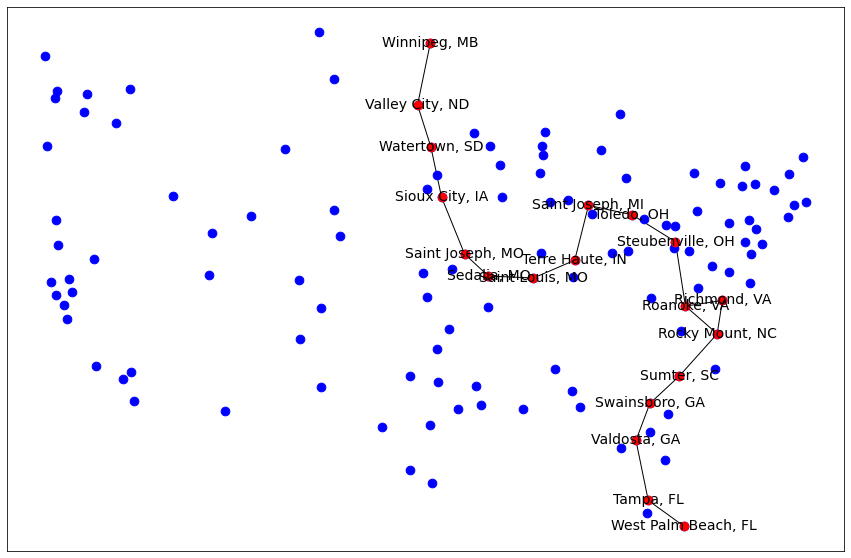

In [14]:
h_weight = 0.5
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path_h, 'provided')))

#### Heuristic Weight = 1

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Saint Joseph, MI', 'Toledo, OH', 'Steubenville, OH', 'Roanoke, VA', 'Richmond, VA', 'Rocky Mount, NC', 'Sumter, SC', 'Swainsboro, GA', 'Valdosta, GA', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 3345.422547498203 miles
Provided Distances = 11588.0 miles


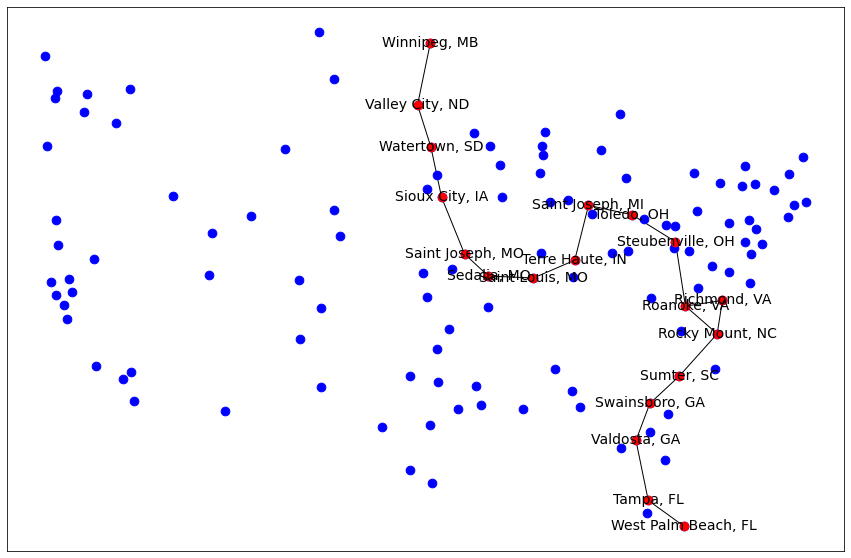

In [15]:
h_weight = 1
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path_h, 'provided')))

#### Heuristic Weight = 2

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Saint Joseph, MI', 'Toledo, OH', 'Steubenville, OH', 'Roanoke, VA', 'Richmond, VA', 'Rocky Mount, NC', 'Sumter, SC', 'Swainsboro, GA', 'Valdosta, GA', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 3345.422547498203 miles
Provided Distances = 11588.0 miles


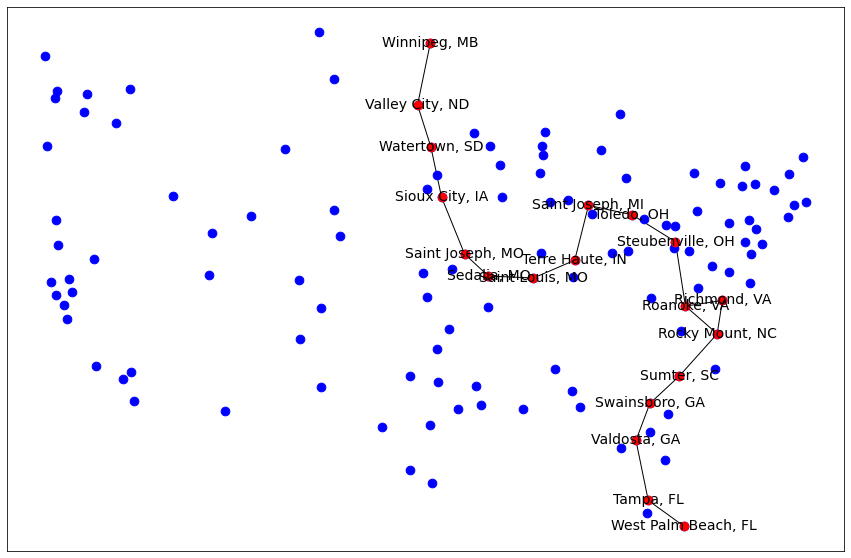

In [16]:
h_weight = 2
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path_h, 'provided')))

#### Heuristic Weight = 7

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Saint Joseph, MI', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Roanoke, VA', 'Rocky Mount, NC', 'Sumter, SC', 'Swainsboro, GA', 'Saint Augustine, FL', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 3216.1342482994282 miles
Provided Distances = 13402.0 miles


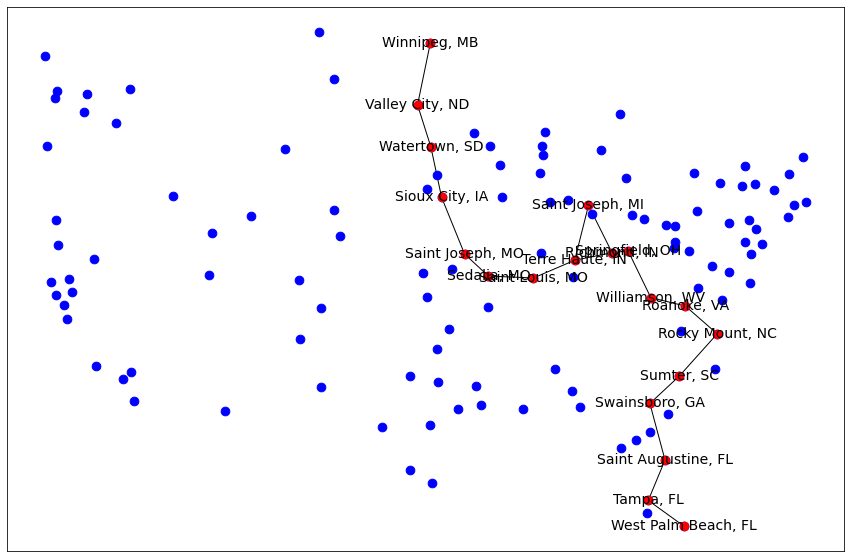

In [17]:
h_weight = 7
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path_h, 'provided')))

#### Heuristic Weight = 8
**This is the first good one**

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Swainsboro, GA', 'Saint Augustine, FL', 'Sarasota, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2803.516008141106 miles
Provided Distances = 14710.0 miles


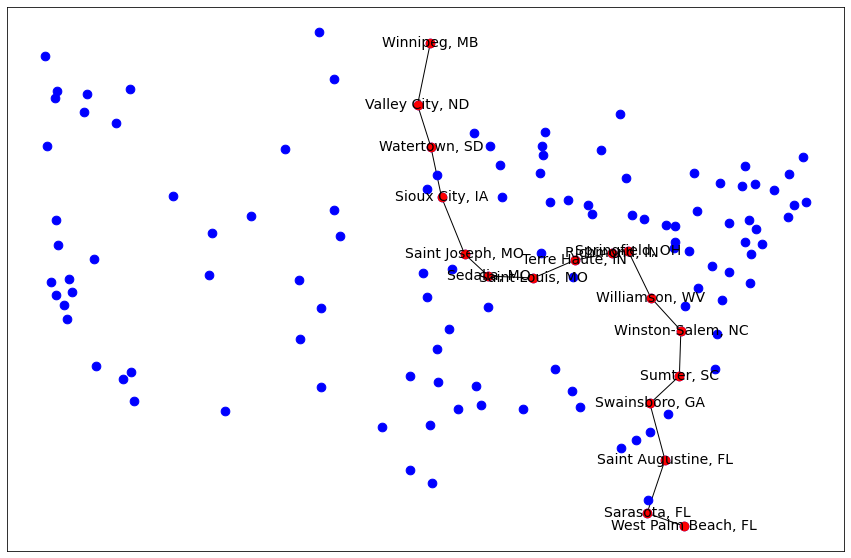

In [18]:
h_weight = 8
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path_h, 'provided')))

#### Heuristic Weight = 10

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Swainsboro, GA', 'Saint Augustine, FL', 'Sarasota, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2803.516008141106 miles
Provided Distances = 14710.0 miles


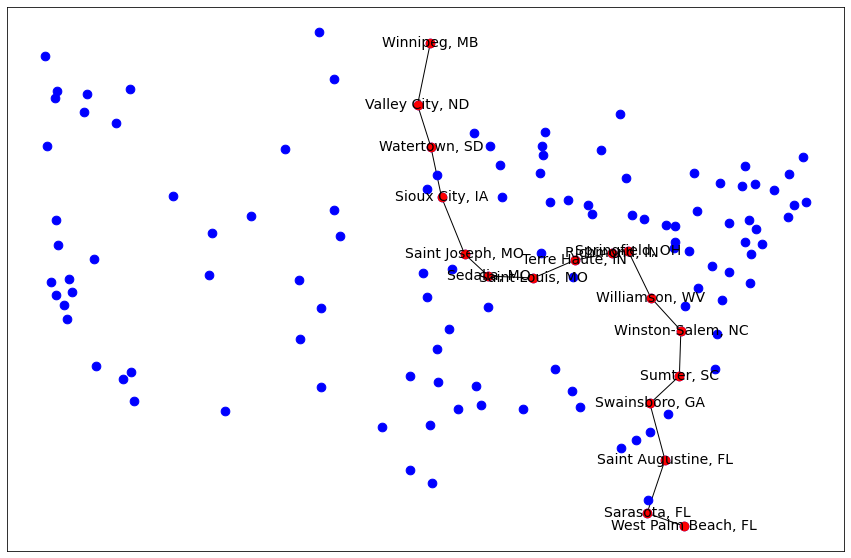

In [19]:
h_weight = 10
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path_h, 'provided')))

#### Heuristic Weight = 12

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Saint Augustine, FL', 'Sarasota, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2727.6287962758092 miles
Provided Distances = 15477.0 miles


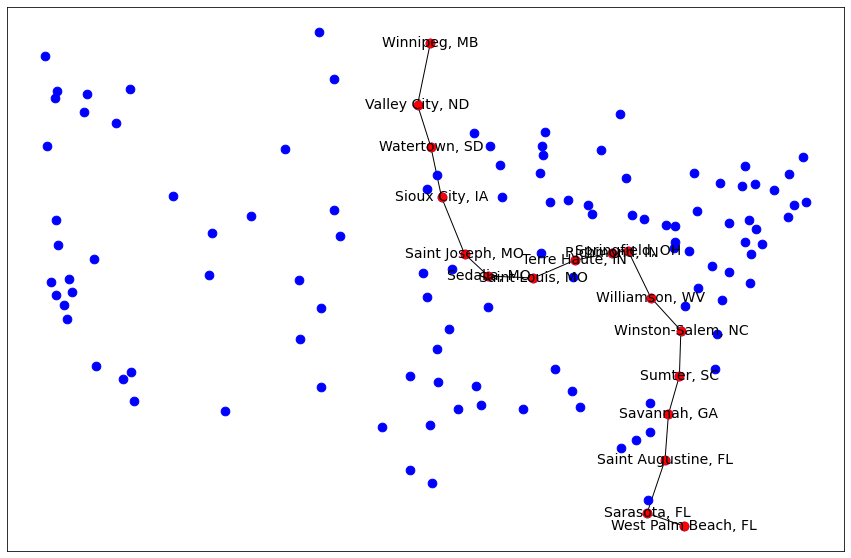

In [20]:
h_weight = 12
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(astar_path_h, 'provided')))

#### Comments:
Adding the heuristic obviously affects the practicality of the algorithm. Without a heuristic, the path takes unintuitive detours. Even with normal weighting, the path still doesn't seem practical. **A heuristic weight of about 8 seems to be the sweet spot for this problem**, as that is the first practical path.

The next improvement comes at a heuristic weight of 12, which seems to be the most direct possible path.

_However, it is worth noting that adding the heuristic weight lowers the total euclidean path length, while increasing the road distance travelled._

### Dijkstra Shortest Path

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Saint Joseph, MI', 'Toledo, OH', 'Steubenville, OH', 'Roanoke, VA', 'Richmond, VA', 'Rocky Mount, NC', 'Sumter, SC', 'Swainsboro, GA', 'Valdosta, GA', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 3345.422547498203 miles
Provided Distances = 11588.0 miles


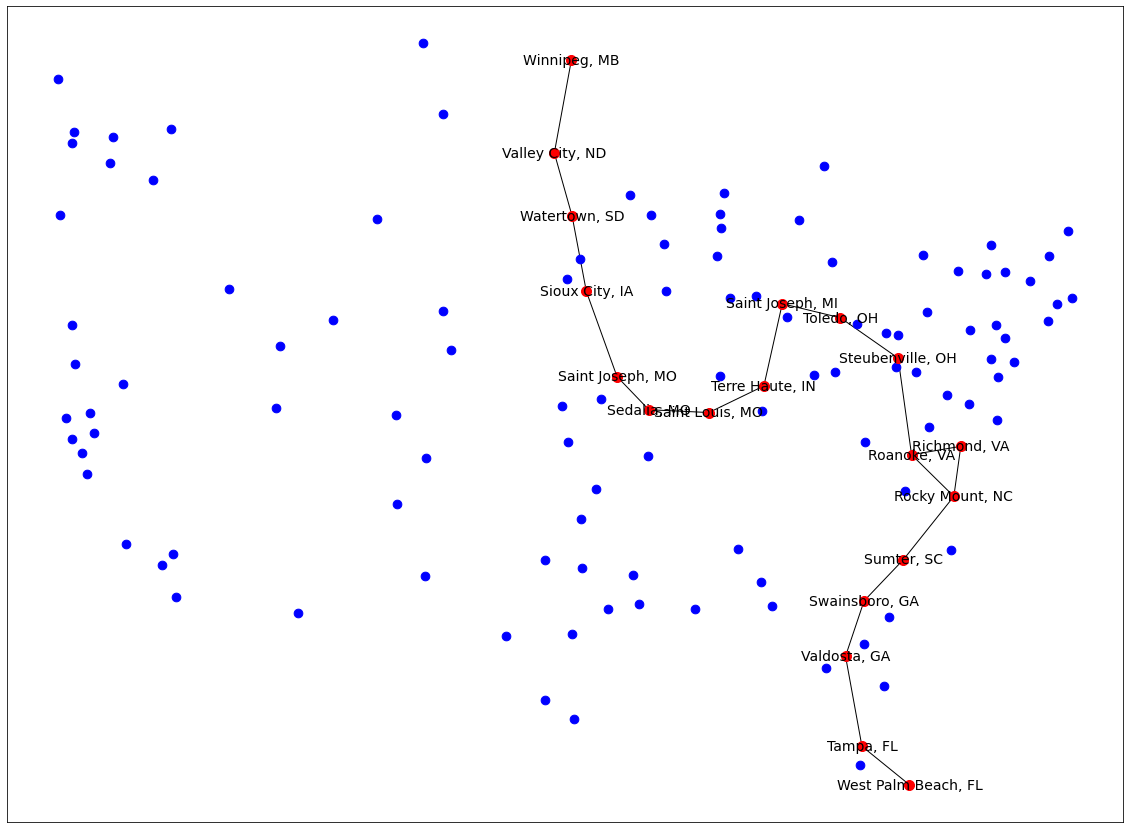

In [21]:
dijkstra_path = nx.dijkstra_path(G, start, destination, weight='drive')
print(dijkstra_path)

plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(dijkstra_path), pos=G_pos, node_size=100, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(dijkstra_path, 'euclidean')))
print('Provided Distances = {} miles'.format(path_length(dijkstra_path, 'provided')))

#### Comments:
The path calculated by the Dijkstra algorithm is the same as A* with no heuristic, up to A* with a heuristic weight of 7.